In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset # Using TensorDataset for simple examples

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Simulate Neural Network

In [4]:
# prepare input
inp = torch.tensor([0.5, -1.0]).to(device)
inp.cpu().numpy()

array([ 0.5, -1. ], dtype=float32)

In [5]:
# make neural network
neural1 = nn.Linear(2, 1).to(device)
print(neural1.weight.data.cpu().numpy())
print(neural1.bias.data.cpu().numpy())

[[-0.5889977  -0.01632567]]
[-0.62674826]


In [6]:
# weighted sum
wx_b = neural1(inp)
wx_b.item()

-0.9049214720726013

In [7]:
# activation function
out = torch.sigmoid(wx_b)
out.item()

0.2880401909351349

# Multi-Layer Neural Network

In [8]:
# make neural network
neural1 = nn.Linear(2, 3).to(device)
print(neural1.weight.data.cpu().numpy())
print(neural1.bias.data.cpu().numpy())

[[-0.25909403 -0.47720447]
 [-0.62256634 -0.08069225]
 [ 0.61771405 -0.40644786]]
[-0.11038521  0.3373765   0.68074495]


In [9]:
neural2 = nn.Linear(3, 1).to(device)
print(neural2.weight.data.cpu().numpy())
print(neural2.bias.data.cpu().numpy())

[[0.53258383 0.12959644 0.165465  ]]
[-0.11256585]


In [10]:
# weighted sum
wx_b1 = neural1(inp)
wx_b2 = neural2(wx_b1)
print(wx_b1.data.cpu().numpy())
print(wx_b2.item())

[0.23727223 0.10678558 1.3960497 ]
0.2586379051208496


In [11]:
# activation function
out = torch.sigmoid(wx_b2)
out.item()

0.5643014311790466

# Activation Functions
- 비선형이 없으면 아무리 깊어도 전체가 하나의 선형변환과 같음.
- 비선형이 들어가야 XOR 같은 비선형 패턴·복잡한 결정 경계를 학습할 수 있음

In [12]:
x_vals = torch.linspace(-6, 6, 100) # Input values for plotting

In [13]:
x_vals.numpy().round(2), len(x_vals)

(array([-6.  , -5.88, -5.76, -5.64, -5.52, -5.39, -5.27, -5.15, -5.03,
        -4.91, -4.79, -4.67, -4.55, -4.42, -4.3 , -4.18, -4.06, -3.94,
        -3.82, -3.7 , -3.58, -3.45, -3.33, -3.21, -3.09, -2.97, -2.85,
        -2.73, -2.61, -2.48, -2.36, -2.24, -2.12, -2.  , -1.88, -1.76,
        -1.64, -1.52, -1.39, -1.27, -1.15, -1.03, -0.91, -0.79, -0.67,
        -0.55, -0.42, -0.3 , -0.18, -0.06,  0.06,  0.18,  0.3 ,  0.42,
         0.55,  0.67,  0.79,  0.91,  1.03,  1.15,  1.27,  1.39,  1.52,
         1.64,  1.76,  1.88,  2.  ,  2.12,  2.24,  2.36,  2.48,  2.61,
         2.73,  2.85,  2.97,  3.09,  3.21,  3.33,  3.45,  3.58,  3.7 ,
         3.82,  3.94,  4.06,  4.18,  4.3 ,  4.42,  4.55,  4.67,  4.79,
         4.91,  5.03,  5.15,  5.27,  5.39,  5.52,  5.64,  5.76,  5.88,
         6.  ], dtype=float32),
 100)

In [14]:
# Sigmoid
sigmoid_fn = nn.Sigmoid()
y_sigmoid = sigmoid_fn(x_vals)
y_sigmoid.numpy()

array([0.00247262, 0.00279037, 0.00314881, 0.00355314, 0.00400918,
       0.00452348, 0.00510342, 0.00575729, 0.00649438, 0.00732514,
       0.00826129, 0.00931596, 0.01050385, 0.01184139, 0.01334696,
       0.01504103, 0.01694644, 0.01908854, 0.0214955 , 0.02419848,
       0.02723188, 0.03063359, 0.0344452 , 0.03871213, 0.04348381,
       0.04881379, 0.0547597 , 0.06138312, 0.06874939, 0.07692721,
       0.08598798, 0.09600496, 0.10705215, 0.11920293, 0.13252817,
       0.14709423, 0.16296048, 0.18017662, 0.19877961, 0.21879077,
       0.24021249, 0.2630254 , 0.28718594, 0.31262437, 0.33924365,
       0.36691964, 0.39550206, 0.4248169 , 0.4546703 , 0.48485318,
       0.51514685, 0.5453297 , 0.5751831 , 0.6044979 , 0.6330803 ,
       0.6607563 , 0.68737566, 0.71281403, 0.73697466, 0.7597875 ,
       0.7812093 , 0.80122036, 0.8198233 , 0.8370395 , 0.85290575,
       0.8674718 , 0.880797  , 0.8929478 , 0.903995  , 0.9140121 ,
       0.9230728 , 0.93125063, 0.93861693, 0.9452403 , 0.95118

In [15]:
# Tanh
tanh_fn = nn.Tanh()
y_tanh = tanh_fn(x_vals)
y_tanh

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9999,
        -0.9999, -0.9999, -0.9999, -0.9998, -0.9998, -0.9997, -0.9996, -0.9995,
        -0.9994, -0.9992, -0.9990, -0.9988, -0.9984, -0.9980, -0.9975, -0.9968,
        -0.9959, -0.9947, -0.9933, -0.9915, -0.9892, -0.9862, -0.9825, -0.9777,
        -0.9717, -0.9640, -0.9544, -0.9422, -0.9270, -0.9078, -0.8840, -0.8545,
        -0.8183, -0.7740, -0.7207, -0.6572, -0.5828, -0.4971, -0.4005, -0.2941,
        -0.1798, -0.0605,  0.0605,  0.1798,  0.2941,  0.4005,  0.4971,  0.5828,
         0.6572,  0.7207,  0.7740,  0.8183,  0.8545,  0.8840,  0.9078,  0.9270,
         0.9422,  0.9544,  0.9640,  0.9717,  0.9777,  0.9825,  0.9862,  0.9892,
         0.9915,  0.9933,  0.9947,  0.9959,  0.9968,  0.9975,  0.9980,  0.9984,
         0.9988,  0.9990,  0.9992,  0.9994,  0.9995,  0.9996,  0.9997,  0.9998,
         0.9998,  0.9999,  0.9999,  0.9999,  0.9999,  0.9999,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.00

In [16]:
# ReLU
relu_fn = nn.ReLU()
y_relu = relu_fn(x_vals)
y_relu

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0606, 0.1818, 0.3030, 0.4242,
        0.5455, 0.6667, 0.7879, 0.9091, 1.0303, 1.1515, 1.2727, 1.3939, 1.5152,
        1.6364, 1.7576, 1.8788, 2.0000, 2.1212, 2.2424, 2.3636, 2.4848, 2.6061,
        2.7273, 2.8485, 2.9697, 3.0909, 3.2121, 3.3333, 3.4545, 3.5758, 3.6970,
        3.8182, 3.9394, 4.0606, 4.1818, 4.3030, 4.4242, 4.5455, 4.6667, 4.7879,
        4.9091, 5.0303, 5.1515, 5.2727, 5.3939, 5.5152, 5.6364, 5.7576, 5.8788,
        6.0000])

In [17]:
# Leaky ReLU
leaky_relu_fn = nn.LeakyReLU(negative_slope=0.1)
y_leaky_relu = leaky_relu_fn(x_vals)
y_leaky_relu

tensor([-0.6000, -0.5879, -0.5758, -0.5636, -0.5515, -0.5394, -0.5273, -0.5152,
        -0.5030, -0.4909, -0.4788, -0.4667, -0.4545, -0.4424, -0.4303, -0.4182,
        -0.4061, -0.3939, -0.3818, -0.3697, -0.3576, -0.3455, -0.3333, -0.3212,
        -0.3091, -0.2970, -0.2848, -0.2727, -0.2606, -0.2485, -0.2364, -0.2242,
        -0.2121, -0.2000, -0.1879, -0.1758, -0.1636, -0.1515, -0.1394, -0.1273,
        -0.1152, -0.1030, -0.0909, -0.0788, -0.0667, -0.0545, -0.0424, -0.0303,
        -0.0182, -0.0061,  0.0606,  0.1818,  0.3030,  0.4242,  0.5455,  0.6667,
         0.7879,  0.9091,  1.0303,  1.1515,  1.2727,  1.3939,  1.5152,  1.6364,
         1.7576,  1.8788,  2.0000,  2.1212,  2.2424,  2.3636,  2.4848,  2.6061,
         2.7273,  2.8485,  2.9697,  3.0909,  3.2121,  3.3333,  3.4545,  3.5758,
         3.6970,  3.8182,  3.9394,  4.0606,  4.1818,  4.3030,  4.4242,  4.5455,
         4.6667,  4.7879,  4.9091,  5.0303,  5.1515,  5.2727,  5.3939,  5.5152,
         5.6364,  5.7576,  5.8788,  6.00

In [18]:
# Softmax (applied to a sample batch of logits)
softmax_fn = nn.Softmax(dim=1)
sample_logits = torch.tensor([[1.0, -0.5, 2.0], [0.1, 0.5, 0.2]]) # Batch of 2, 3 classes
y_softmax = softmax_fn(sample_logits)
print(y_softmax)
print(y_softmax[0,:].sum())
print(y_softmax[1,:].sum())

tensor([[0.2537, 0.0566, 0.6897],
        [0.2780, 0.4147, 0.3072]])
tensor(1.0000)
tensor(1.)


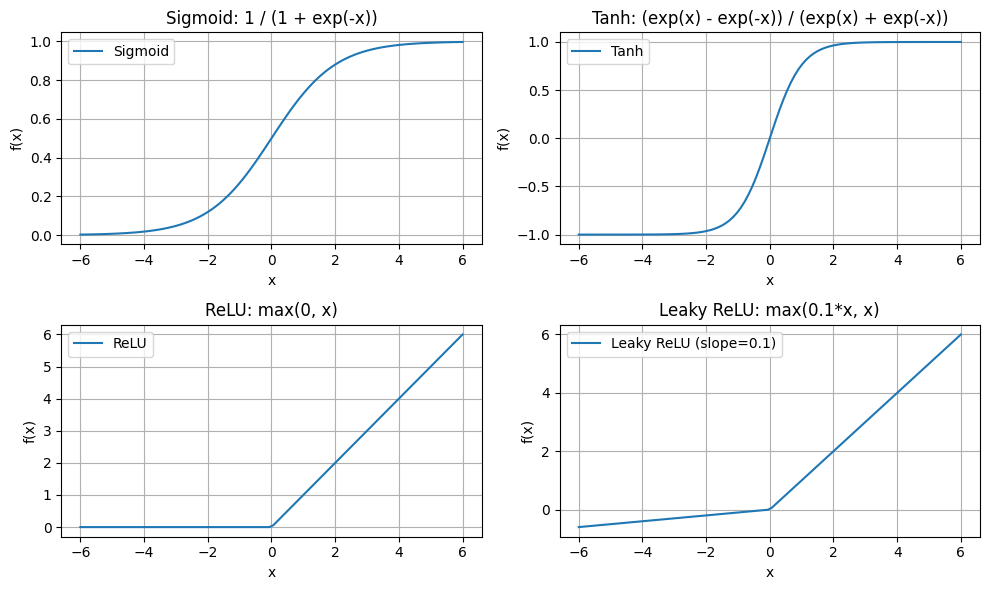

In [19]:
# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(x_vals.numpy(), y_sigmoid.numpy(), label='Sigmoid')
plt.title('Sigmoid: 1 / (1 + exp(-x))')
plt.xlabel('x'); plt.ylabel('f(x)'); plt.grid(True); plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_vals.numpy(), y_tanh.numpy(), label='Tanh')
plt.title('Tanh: (exp(x) - exp(-x)) / (exp(x) + exp(-x))')
plt.xlabel('x'); plt.ylabel('f(x)'); plt.grid(True); plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_vals.numpy(), y_relu.numpy(), label='ReLU')
plt.title('ReLU: max(0, x)')
plt.xlabel('x'); plt.ylabel('f(x)'); plt.grid(True); plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x_vals.numpy(), y_leaky_relu.numpy(), label='Leaky ReLU (slope=0.1)')
plt.title('Leaky ReLU: max(0.1*x, x)')
plt.xlabel('x'); plt.ylabel('f(x)'); plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()
plt.close()

# Multi-Layer Perceptrons (MLP) - Deep Neural Network

In [20]:
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        # nn.Module을 초기화 (파이토치의 모든 모델은 이걸 상속)
        super(SimpleMLP, self).__init__()

        # 완전연결(선형) 층 1: 입력 특징(input_size) -> 은닉 특징(hidden_size)
        # 예) 784(28x28 이미지) -> 128
        self.fc1 = nn.Linear(input_size, hidden_size)

        # ReLU 활성화: 음수는 0으로, 양수는 그대로 통과 (학습을 돕는 비선형 함수)
        self.relu1 = nn.ReLU()

        # 완전연결 층 2: hidden_size -> hidden_size
        # (두 번째 은닉층, 차원을 그대로 유지하는 설정)
        self.fc2 = nn.Linear(hidden_size, hidden_size)

        # 두 번째 ReLU
        self.relu2 = nn.ReLU()

        # 출력층: hidden_size -> num_classes
        # 분류 문제라면 클래스 수만큼 로짓(logits)을 뽑아냄
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x: 입력 텐서, 모양은 [batch_size, input_size]
        # 예) 배치 크기 32, 입력 784라면 [32, 784]

        out = self.fc1(x)     # [batch_size, hidden_size]
        out = self.relu1(out) # 비선형 통과

        out = self.fc2(out)   # [batch_size, hidden_size]
        out = self.relu2(out) # 비선형 통과

        out = self.fc3(out)   # [batch_size, num_classes] (각 클래스의 점수=로짓)
        
        return out            # 주의: 보통 분류 손실(CrossEntropyLoss)은 softmax 없이 '로짓'을 그대로 받습니다.


In [21]:
input_dim = 100  # 입력 특성(피처) 차원
hidden_dim = 64  # 은닉층 차원
output_dim = 5   # 분류할 클래스 개수

In [22]:
model = SimpleMLP(input_dim, hidden_dim, output_dim).to(device)
model

SimpleMLP(
  (fc1): Linear(in_features=100, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)

In [23]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

10949

In [24]:
batch_size = 4
dummy_input = torch.randn(batch_size, input_dim).to(device) # [batch_size, input_features]
dummy_input.shape

torch.Size([4, 100])

In [25]:
with torch.no_grad(): # 예측시 기울기(gradient) 계산이 필요 없습니다
    predictions = model(dummy_input)

In [26]:
print(predictions.shape)
print(predictions[0].cpu().numpy())

torch.Size([4, 5])
[ 0.05706349 -0.11710092 -0.17206922  0.1313279   0.00155698]


# Loss Functions
- 학습을 하기 위해 모델의 error를 계산

## Mean Squard Error

In [27]:
# For Regression
loss_mse_fn = nn.MSELoss()

In [28]:
predictions_reg = torch.tensor([1.0, 2.5, 3.8], device=device) # 모델을 히용하여 Forward 연산을 한 결과 outputs
targets_reg = torch.tensor([1.2, 2.3, 4.0], device=device)     # 학습을 위해 입력으로 넣어준 Label. 즉 정답.

In [29]:
mse = loss_mse_fn(predictions_reg, targets_reg)
mse.item()

0.04000001773238182

## Cross-Entropy

In [30]:
# For Multi-class Classification
loss_ce_fn = nn.CrossEntropyLoss()

In [31]:
predictions_mc = torch.tensor([[2.0, 0.5, -1.0], [0.1, 1.5, 0.2]], device=device) # 2 samples, 3 classes
targets_mc = torch.tensor([0, 1], device=device) # True class indices for each sample

In [32]:
ce = loss_ce_fn(predictions_mc, targets_mc)
ce.item()

0.32972416281700134

# Binary Cross-Entropy

In [33]:
# For Binary Classification
loss_bce_logits_fn = nn.BCEWithLogitsLoss()

In [34]:
predictions_bc = torch.tensor([-0.5, 1.5, -2.0, 3.0], device=device).unsqueeze(1) # 4 samples, 1 logit each
targets_bc = torch.tensor([0.0, 1.0, 0.0, 1.0], device=device).unsqueeze(1)       # True binary labels (0 or 1)

In [35]:
bce_wl = loss_bce_logits_fn(predictions_bc, targets_bc)
bce_wl.item()

0.21275141835212708

# Optimizers
- 학습하는 방법 : 모델 파라미터(W:weight, B:bias)를 학습. loss function 값이 최소화 도로록 만듬.

## Loading Data

In [79]:
# Create dummy input, target
dummy_input = torch.randn(5, 10).to(device)
dummy_target = torch.randn(5, 2).to(device)

In [80]:
dummy_input.shape, dummy_target.shape

(torch.Size([5, 10]), torch.Size([5, 2]))

## Creaate Model

In [81]:
# Create a dummy model for optimizer demonstration
dummy_model = nn.Linear(10, 2).to(device) # 10 input features, 2 output features

## Define Loss Function

In [82]:
loss_fn = nn.MSELoss()

## Optimizer

In [89]:
# Adam Optimizer
optimizer = optim.Adam(dummy_model.parameters(), lr=0.001)

In [90]:
dummy_model.weight

Parameter containing:
tensor([[ 0.4214,  0.2016, -0.4009, -0.0251,  0.0852, -0.0959, -0.0099,  0.2602,
         -0.0432,  0.0944],
        [-0.3970, -0.0151,  0.0107, -0.0301,  0.1352,  0.2298,  0.0433,  0.0417,
          0.0038, -0.0754]], device='cuda:0', requires_grad=True)

In [91]:
# SGD Example Step
optimizer.zero_grad()                     # Clear previous gradients
outputs = dummy_model(dummy_input)        # Forward pass
loss = loss_fn(outputs, dummy_target) # Calculate loss
loss.backward()                           # Backward pass (compute gradients)
optimizer.step()                          # Update weights

In [92]:
dummy_model.weight

Parameter containing:
tensor([[ 0.4224,  0.2026, -0.4019, -0.0241,  0.0842, -0.0969, -0.0109,  0.2612,
         -0.0442,  0.0934],
        [-0.3960, -0.0141,  0.0117, -0.0291,  0.1362,  0.2288,  0.0423,  0.0407,
          0.0048, -0.0744]], device='cuda:0', requires_grad=True)

# Neural Network For XOR Problem

## Loading Data

In [166]:
X_xor = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]], device=device)
y_xor = torch.tensor([[0.], [1.], [1.], [0.]], device=device)
X_xor.shape, y_xor.shape, X_xor.dtype

(torch.Size([4, 2]), torch.Size([4, 1]), torch.float32)

In [148]:
# Create a simple Dataset
xor_dataset = TensorDataset(X_xor, y_xor)

In [149]:
# Create a simple DataLoader
xor_dataloader = DataLoader(xor_dataset, batch_size=4, shuffle=True)

## Define The Model

In [150]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 8)      # 2 input features, 8 neurons in hidden layer
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)      # 8 hidden neurons, 1 output neuron
        # Sigmoid will be applied implicitly by BCEWithLogitsLoss or explicitly after if using BCELoss

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x # Output raw logits

In [151]:
xor_model = XORNet().to(device)
xor_model

XORNet(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)

## Define Loss Function and Optimizer

In [152]:
loss_fn = nn.BCEWithLogitsLoss() # Handles sigmoid internally, more stable
optimizer = optim.Adam(xor_model.parameters(), lr=0.05) # Adam with a slightly higher LR for faster convergence on XOR

## Learning

In [153]:
num_epochs = 1000

In [154]:
losses_history = []
for epoch in range(num_epochs):
    for inputs, labels in xor_dataloader: # Dataloader handles batching
        # Inputs and labels are already on `device` if X_xor, y_xor were created on device
        
        # Forward pass
        outputs = xor_model(inputs) # Model outputs raw logits
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    losses_history.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.0050
Epoch [200/1000], Loss: 0.0014
Epoch [300/1000], Loss: 0.0007
Epoch [400/1000], Loss: 0.0004
Epoch [500/1000], Loss: 0.0003
Epoch [600/1000], Loss: 0.0002
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0001
Epoch [1000/1000], Loss: 0.0001


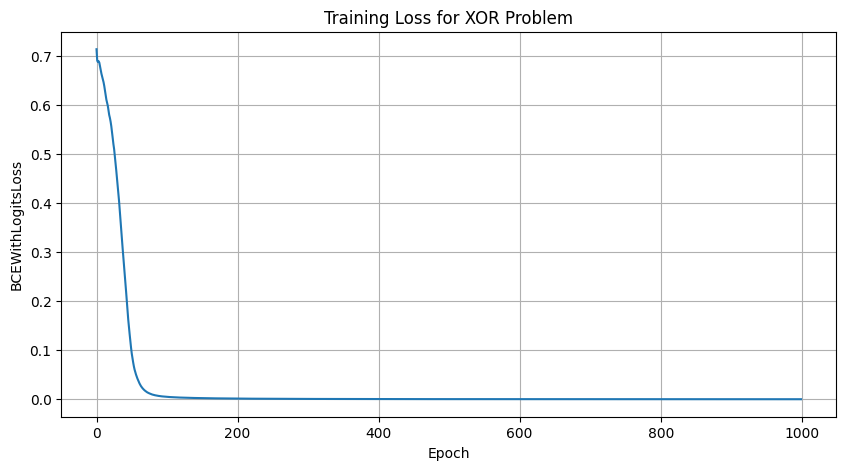

In [155]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses_history)
plt.title('Training Loss for XOR Problem')
plt.xlabel('Epoch')
plt.ylabel('BCEWithLogitsLoss')
plt.grid(True)
plt.show()
plt.close()

# Evaluate
- logits는 모델이 계산한 정규화 전 점수(원시 점수)

In [159]:
xor_model.eval() # Set model to evaluation mode (important for layers like dropout, batchnorm)

XORNet(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)

In [214]:
def predictXOR(data=[1, 0]):
    tensor_data = torch.tensor([data], dtype=torch.float32, device=device)
    
    with torch.no_grad(): # Disable gradient calculations for inference
        test_predictions_logits = xor_model(tensor_data)
        test_predictions_probs = torch.sigmoid(test_predictions_logits)

    return int((test_predictions_probs >= 0.5).item())

In [216]:
predictXOR([1, 0])

1